In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import csv
import os
import pickle
from matplotlib import rc
from matplotlib import animation
from numpy import ndarray
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec
import itertools
from cycler import cycler
import time
import pylab as pl
import tkinter
import tkinter.messagebox
import seaborn as sns
plt.style.use('ggplot')

w = 30 #width of the figure
h = 15 #height of the figure
n=100 #number of points
m=25 #number of iterations before 50% of people start wearing masks. EITHER SET THIS AS 25 or 75
#m=75
m1=300 #Total number of iterations
p=int(n*(n+1)/2)
colors=[[(0,.6,0,0.75)]*n for _ in range(m1+1)] #initial setting of the colors; set as green
colorsArray=np.array(colors,dtype='float') #making colors into array
colorsArray1=np.array(colors,dtype='float') 
colorsArray2=np.array(colors,dtype='float')
colorsArray[0] = [0,0.6,0,1]#this color (green) shows initially no infected people
colorsArray1[0] = [0,0.6,0,1] #this color (green) shows initially no infected people
colorsArray2[0] = [0,0,0,0] #used for opaquing the scatter plot
x=np.linspace(0,30,100) #initial x positions of the points are randomly chosen from this set
y=np.linspace(0,15,50) #initial y positions of the points are randomly chosen from this set

cluster = [['a']*n] #initializing; this is used to indicate circles and crosses (non-masked and masked, respectively)
cluster1=np.array(cluster,dtype='str')
#The following loop is used to indicate even ones with a cross (for masked) and odd ones with a circle (non-masked)
for i in range(n):
    if (i%2==0):
        cluster1[0][i]='X'
    if (i%2==1):
        cluster1[0][i]='o'
        
t11=[[0]*n for _ in range(m1+1)]
t22=[[0]*n for _ in range(m1+1)]
t33=[[0]*p]
t44=[[0]*n for _ in range(m1+1)]
t1=np.array(t11,dtype='f')
t2=np.array(t22, dtype='f')
t3=np.array(t33,dtype='f')
t4=np.array(t44,dtype='int16')
t4[:,0]=1
t55=[[0]*m1]
t5=np.array(t55,dtype='int16')
z1=[[0]*m1]
z=np.array(z1,dtype='int16')
z2=np.array(z1,dtype='int16')
#These loops are used for setting the initial position of the individuals
for j in range(m1):
    t5[0][j]=j
for i in range(0,int(n/5),2):
    t1[0][i]=15+(i/2)
for i in range(1,int(n/5),2):
    t1[0][i]=15-((i+1)/2)
for i in range(0,int(n/20),2):
    t2[0][i]=7.5+i
for i in range(1,int(n/20),2):
    t2[0][i]=7.5-(i+1)

t1[0]=np.repeat(t1[0][0:20],n/20)
t2[0]=np.tile(t2[0][0:5],int(n/5))
#for i in range(m1+1):
colorsArray[0][0]=[1,0,0,1] #this color (red) indicates that at time t=0, there is one infected individual
colorsArray1[0][0]=[1,0,0,1] #this color (red) indicates that at time t=0, there is one infected individual
colorsArray2[0][0]=[1,0,0,1]
for j in range(0,m+1):
    for i in range(0,n):
        colorsArray2[j][i]=[0,0,0,0]

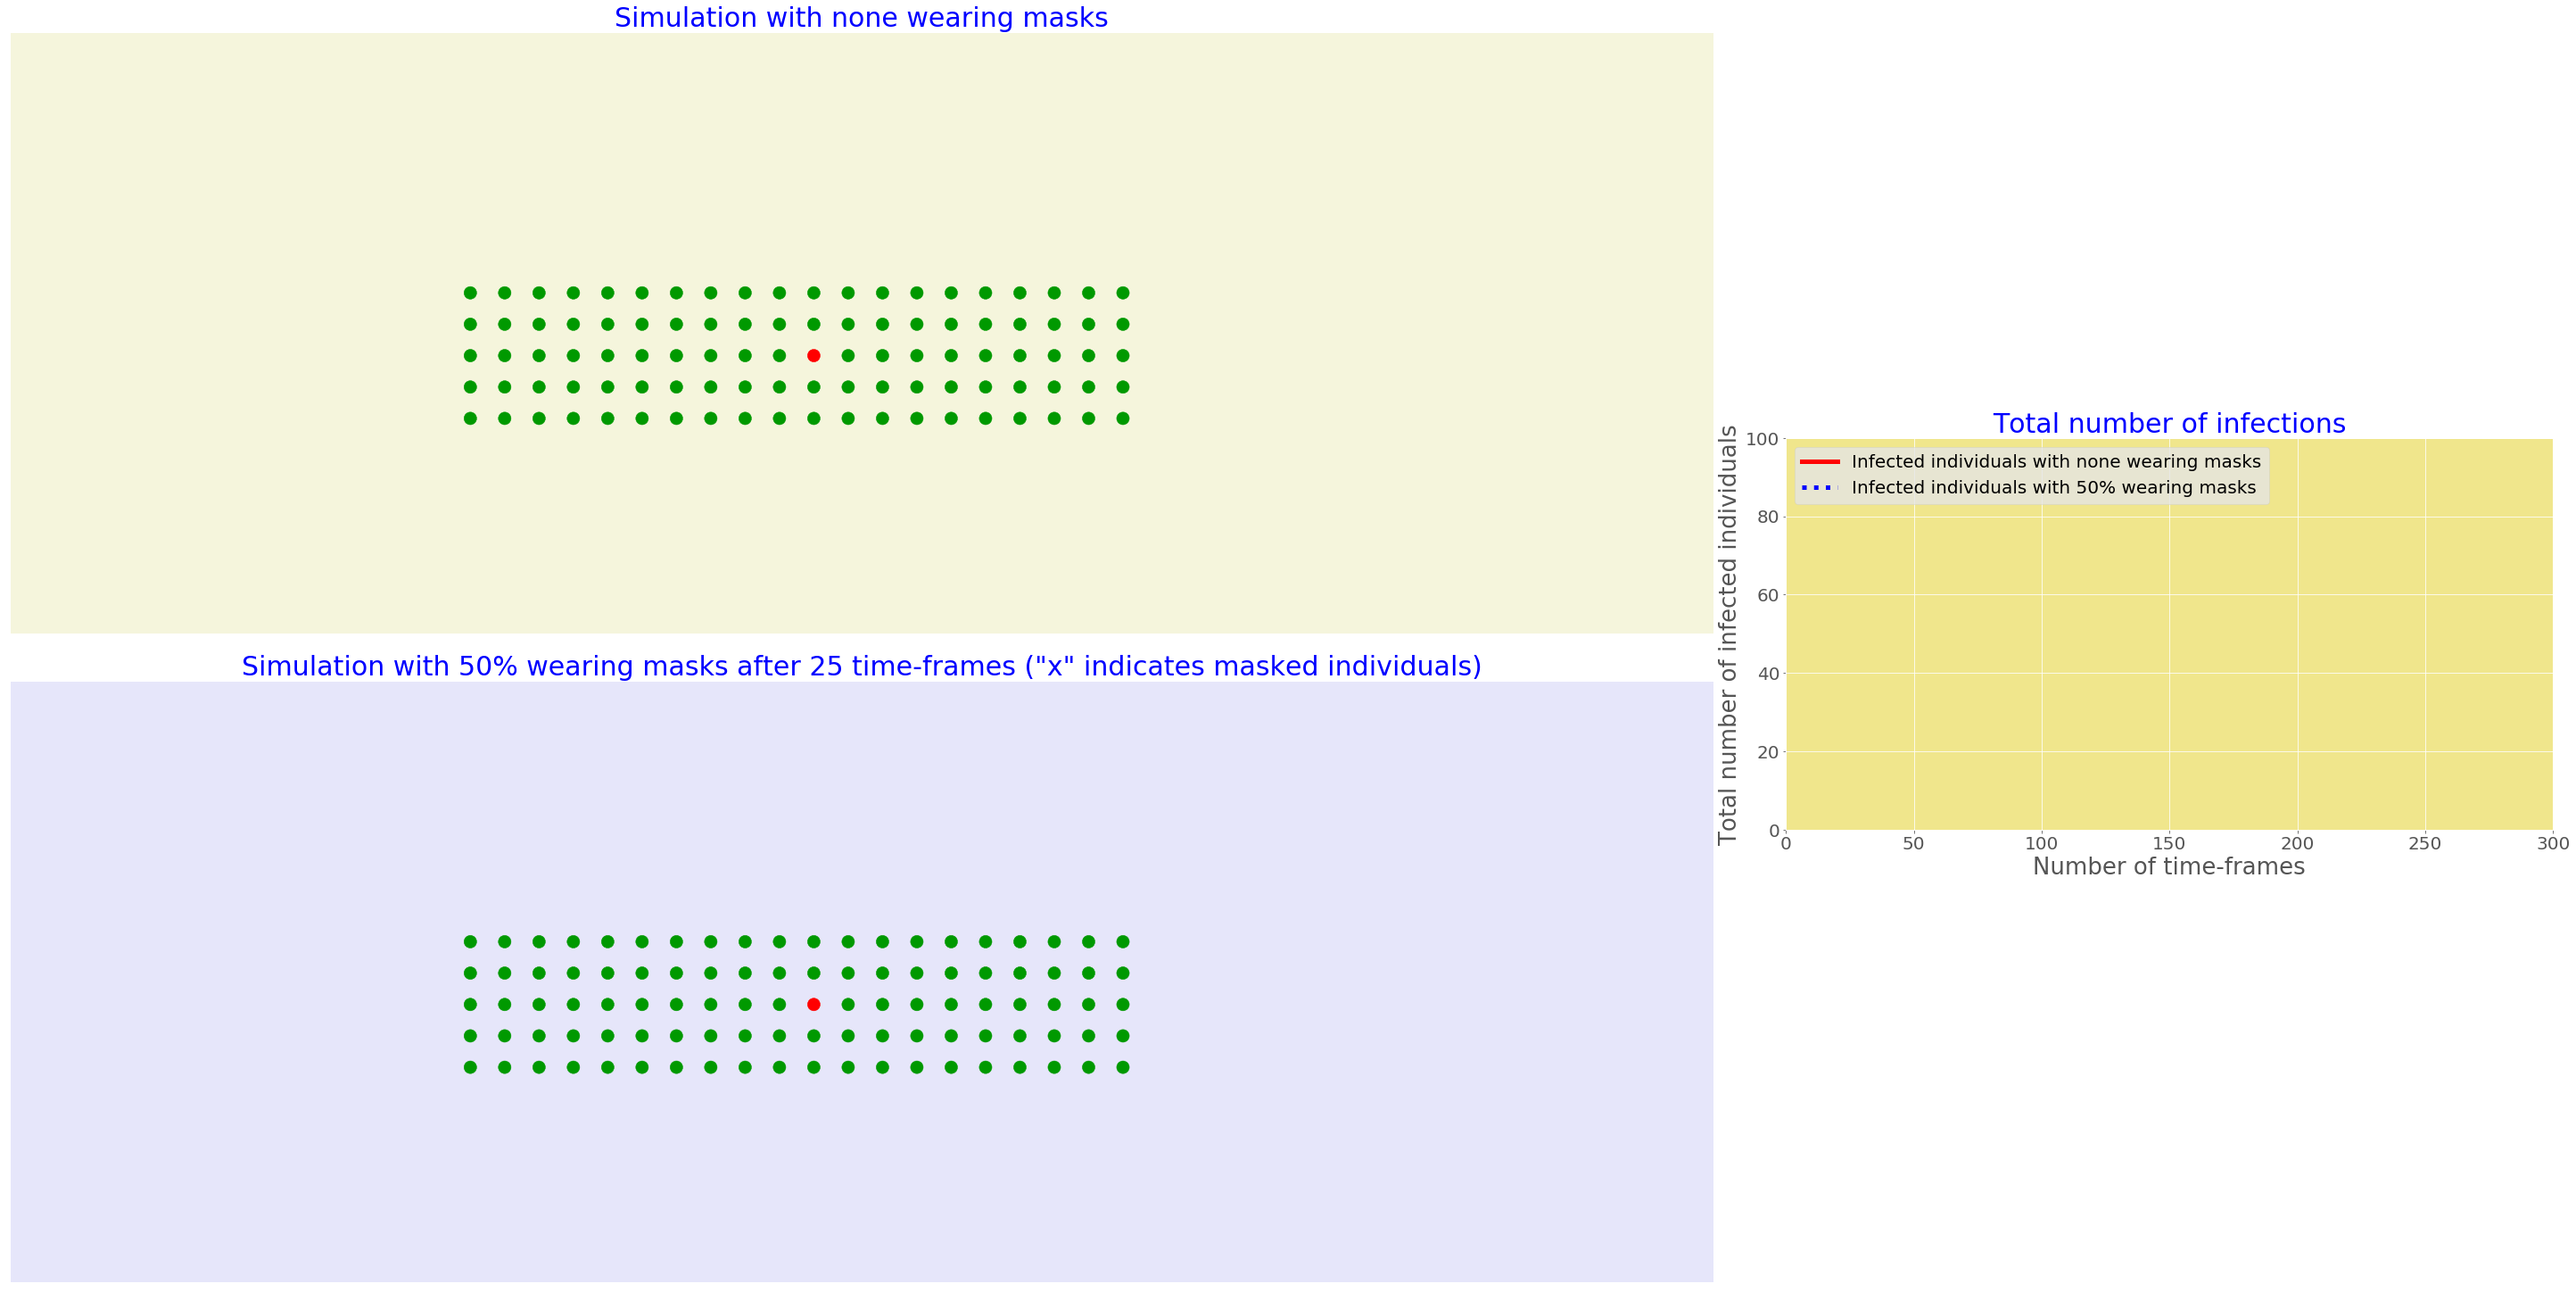

In [16]:
xx= [[0]*n for _ in range(m1+1)]
yy= [[0]*n for _ in range(m1+1)]
x1=np.array(xx,dtype='f')
y1=np.array(yy,dtype='f')
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[2, 1])
fig = plt.figure(figsize=(40,20), constrained_layout=True)
gs0 = fig.add_gridspec(1, 2,width_ratios=[2, 1])
gs00 = gs0[0].subgridspec(2, 1)
gs01 = gs0[1].subgridspec(3, 1)
ax1=fig.add_subplot(gs00[0, 0])
ax3=fig.add_subplot(gs01[1, 0])
ax2=fig.add_subplot(gs00[1, 0])

#The initial position of the individuals
x1[0,:]=t1[0]
y1[0,:]=t2[0]
x1[0,0]=15
y1[0,0]=7.5

### -----------------------------------------------------------------------
#rm=np.array(t11,dtype='f')
#x2=np.array(t11,dtype='f')
#y2=np.array(t11,dtype='f')
#radius=np.linspace(0.2,.8,50)
#rm1=np.array(t11,dtype='f')
#angles=np.linspace(0,2*np.pi,50)
#zz=[[0]*(m1+1)]
#z=np.array(zz,dtype='int16')

#this loop is used to randomly choose the angles and the distance the n particles move from one 
#iteration to the next. Note that there are a total of m1 iterations

#for j in range(1,m1+1):
#    for i in range(n):
#        rm1[j][i]=random.choice(radius)
#        rm[j][i]=random.choice(angles)
#        x2[j][i]=rm1[j][i]*np.cos(rm[j][i])
#        y2[j][i]=rm1[j][i]*np.sin(rm[j][i])
#        x1[j][i]=x1[j-1][i]+x2[j][i]
#        y1[j][i]=y1[j-1][i]+y2[j][i]

###-------------------------------------------------------------------
        
#The random positions are now saved so that we can use the same positions later when we delay mask wearing. 
#These positions are stored in these 2 csv files
#np.savetxt('arrayx.csv', x1, delimiter=',', fmt='%.18e')
#np.savetxt('arrayy.csv', y1, delimiter=',', fmt='%.18e')

#HERE I HAVE USED THE RANDOM POSITIONS ALREADY CREATED TO RECREATE THE SCENARIO GIVEN IN figure2 and figure3 
#of the article. 
#If new positions are required, please comment out the five lines below starting from "reader" and
#ending with "y1". Then uncomment the Python code starting from rm=np.array(t11,dtype='f') to y1[j][i] (16 lines)


reader = csv.reader(open("arrayx.csv", "r"), delimiter=",")
alpha = list(reader)
x1 = np.array(alpha).astype('float')
reader = csv.reader(open("arrayy.csv", "r"), delimiter=",")
beta = list(reader)
y1 = np.array(beta).astype('float')

#the limits are set below so that all the n particles are in the "field of vision" for all the iterations 
ax1.set(xlim=((min(map(min, x1))-0.25),(max(map(max, x1)))+0.25),ylim=((min(map(min, y1))-0.25),(max(map(max, y1))+0.25)))       
ax2.set(xlim=((min(map(min, x1))-0.25),(max(map(max, x1)))+0.25),ylim=((min(map(min, y1))-0.25),(max(map(max, y1))+0.25)))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_facecolor('beige')
ax2.set_facecolor('lavender')
ax3.set_facecolor('khaki')
ax1.set_title('Simulation with none wearing masks',size=30,color='b')
ax2.set_title('Simulation with 50% wearing masks after 25 time-frames ("x" indicates masked individuals)',size=30,color='b')
ax3.set_title('Total number of infections',size=30,color='b')
ax3.set(xlim=(0, m1), ylim=(0, n))
ax3.set_xlabel("Number of time-frames",fontsize=26)
ax3.set_ylabel("Total number of infected individuals",fontsize=26)
ax3.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)


#scat1 gives the initial positions with all points indicated by circles with the color scheme given by colorsArray[0].
# Note that colorsArray[0] has all particles green except the one in the center which is red (inidicating infected)
scat1 = ax1.scatter(x1[0], y1[0],c=colorsArray[0],marker='o', s=200)

#This function mscatter is borrowed from 
#https://stackoverflow.com/questions/51810492/how-can-i-add-a-list-of-marker-styles-in-matplotlib
def mscatter(x,y, m=None, **kw):
    import matplotlib.markers as mmarkers
     #if not ax: ax=plt.gca()
    sc = ax2.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                 marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                         marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

M = np.repeat(["o", "X"], n/2)
MM=np.repeat([0,1],n/2)

ipx=x1[m]
ipy=y1[m]
color_at_level_m=colorsArray2[m] #x1[m],y1[m],colorsArray1[m]

#scat2 gives the initial positions with all points indicated by circles with the color scheme given by colorsArray1[0].
# Note that colorsArray1[0] has all particles green except the one in the center which is red (inidicating infected)
#scat3 gives the initial positions with all points indicated by crosses and circles starting from iteration m 
scat3 = mscatter(ipx, ipy, c=color_at_level_m, m=cluster1[0], s=200)# ax=ax)
scat2=mscatter(x1[0], y1[0],c=colorsArray1[0],m='o', s=200)

xdata1, ydata1 = [], []
line1, = ax3.plot([], [],lw=5,color='r',label='Infected individuals with none wearing masks')
xdata2, ydata2 = [], []
line2, = ax3.plot([], [],lw=5,color='b',ls='dotted', label='Infected individuals with 50% wearing masks')
ax3.legend()
ax3.legend(loc='upper left',prop={'size': 20})

In [17]:
#This loop selects infected particles based on how close they are to another infected particle. 
#The infected particles are given red color
for j in range(1,m1+1):
    colorsArray[j]=colorsArray[j-1]
    for k in range(0,n):
        for l in range(k+1,n):
            a=np.sqrt(((x1[j][k]-x1[j][l])*(x1[j][k]-x1[j][l]))+((y1[j][k]-y1[j][l])*(y1[j][k]-y1[j][l])))
            if a<0.3:
                if (colorsArray[j][k][0]==1.0):
                    colorsArray[j][l]=[1,0,0,1]
                elif (colorsArray[j][l][0]==1.0):
                    colorsArray[j][k]=[1,0,0,1]
#Till iteration m which is when 50% start wearing masks, the color arrays are the same. 
#Therefore color arrays are the same.
for j in range(0,m+1):
    colorsArray1[j]=colorsArray[j]

In [18]:
#Here starting from iteration m+1, 50% have started wearing masks. Therefore depending on whether there are interactions 
#between masked (infected) and masked (non-infected) with non-masked (infected) and non-masked (non-infected)
#there are different probabilities of some particle getting infected. This is reflected in these loops
for j in range(m+1,m1+1):
    colorsArray1[j]=colorsArray1[j-1]
    for k in range(0,n,2):
        for l in range(k+2,n,2):
            a=np.sqrt(((x1[j][k]-x1[j][l])*(x1[j][k]-x1[j][l]))+((y1[j][k]-y1[j][l])*(y1[j][k]-y1[j][l])))
            if (a<0.3):
                if (colorsArray1[j][l][0]==1.0 and colorsArray1[j][k][0]==0.0): 
                    if random.randint(1,4)==1:
                        colorsArray1[j][k]=[1,0,0,1]
                elif (colorsArray1[j][k][0]==1.0 and colorsArray1[j][l][0]==0.0):
                    if random.randint(1,4)==1:
                        colorsArray1[j][l]=[1,0,0,1]
                               
    for k in range(0,n,2):
        for l in range(1,n,2):
            a=np.sqrt(((x1[j][k]-x1[j][l])*(x1[j][k]-x1[j][l]))+((y1[j][k]-y1[j][l])*(y1[j][k]-y1[j][l])))
            if a<0.3:
                if (colorsArray1[j][l][0]==1.0 and colorsArray1[j][k][0]==0.0):
                    if (random.randint(1,2)==1):
                        colorsArray1[j][k]=[1,0,0,1] 
                elif (colorsArray1[j][k][0]==1.0 and colorsArray1[j][l][0]==0.0):
                    if (random.randint(1,3)==1):
                        colorsArray1[j][l]=[1,0,0,1] 
    for k in range(1,n,2):
        for l in range(k+2,n,2):
            a=np.sqrt(((x1[j][k]-x1[j][l])*(x1[j][k]-x1[j][l]))+((y1[j][k]-y1[j][l])*(y1[j][k]-y1[j][l])))
            if a<0.3:
                if (colorsArray1[j][l][0]==1.0):
                    colorsArray1[j][k]=[1,0,0,1]
                elif (colorsArray1[j][k][0]==1.0):
                    colorsArray1[j][l]=[1,0,0,1]
    

In [19]:
#These loops count the total number of infected particles for the two situations above
for j in range(m1):
    sum=0
    for i in range(n):
        sum = sum + colorsArray[j][i][0]
    z[0][j]=sum  
for j in range(m1):
    sum1=0
    for i in range(n):
        sum1 = sum1 + colorsArray1[j][i][0]
    z1[0][j]=sum1  


#This function is used for animation    
def animate(j):
    if (j<=m):
        scat1.set_offsets(np.c_[x1[j], y1[j]])
        scat1.set_color(colorsArray[j])
        scat2.set_offsets(np.c_[x1[j], y1[j]])
        scat2.set_color(colorsArray1[j])
        xdata1.append(j)
        ydata1.append(z[0][j])
        line1.set_data(xdata1, ydata1)
        xdata2.append(j)
        ydata2.append(z1[0][j])
        line2.set_data(xdata2, ydata2)
        return scat1, scat2, line1,line2,
   
    if (j>m):
        scat2.set_offsets(np.c_[x1[m], y1[m]])
        scat2.set_color(colorsArray2[m])
        scat1.set_offsets(np.c_[x1[j], y1[j]])
        scat1.set_color(colorsArray[j])
        scat3.set_offsets(np.c_[x1[j], y1[j]])
        scat3.set_color(colorsArray1[j])
        xdata1.append(j)
        ydata1.append(z[0][j])
        line1.set_data(xdata1, ydata1)
        xdata2.append(j)
        ydata2.append(z1[0][j])
        line2.set_data(xdata2, ydata2)
        return scat1, scat3, scat2, line1,line2,
    
anim = animation.FuncAnimation(fig, animate, interval=75, frames=300,blit=True,repeat=True) 
#Simulation25 to save the animation when individuals start wearing masks after 25 time steps
#Simulation75 to save the animation when individuals start wearing masks after 75 time steps
anim.save('figure1.mp4', fps=6, extra_args=['-vcodec', 'libx264'])
plt.draw()
plt.show()




<Figure size 432x288 with 0 Axes>

In [20]:
sum

89.0

In [21]:
sum1

81.0